#Bengaluru house price prediction

The aim of the project is to predict the prices of house in Bangalore based on features like size of the house, BHK and number of baths. This is a regression problem

In [159]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [160]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [161]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [162]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [163]:
df.shape

(13320, 9)

#Data preprocessing

In [164]:
#Dropping features
df2 = df.drop(['area_type','availability','society','balcony'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [165]:
#Checking for null values
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [166]:
df3 = df2.dropna()
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [167]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [168]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [169]:
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


#Feature engineering

In [170]:
#Creating a new column for size with just the number of BHK since the values in the size column are not uniform
df3["BHK"] = df3["size"].apply(lambda x:x.split(" ")[0]) #Apply function applies a function to all Pandas series
df3.BHK.unique()

<ipython-input-170-af5953f0af84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BHK"] = df3["size"].apply(lambda x:x.split(" ")[0]) #Apply function applies a function to all Pandas series


array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [171]:
df3["total_sqft"].unique()
#This column has values in range

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [172]:
print(type(df3["total_sqft"]))

<class 'pandas.core.series.Series'>


In [173]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   BHK         13246 non-null  object 
dtypes: float64(2), object(4)
memory usage: 724.4+ KB


In [174]:
#Function to check if the column value is float or not
def check_float(val):
    try:
      float(val)
    except:
      return False
    return True

In [175]:
len(df3["total_sqft"])

13246

In [176]:
#Choosing those rows with range values in the column
df3[~df3["total_sqft"].apply(check_float)].value_counts() # '~' means opposite

location        size       total_sqft      bath  price    BHK
Whitefield      4 BHK      2830 - 2882     5.0   154.500  4      2
 Rachenahalli   1 RK       385 - 440       1.0   19.800   1      1
Pragathi Nagar  1 BHK      799 - 803       1.0   33.645   1      1
Rajaji Nagar    4 BHK      2563 - 2733     5.0   251.500  4      1
Rajapura        2 BHK      86.72Sq. Meter  2.0   40.000   2      1
                                                                ..
Hormavu         1 BHK      527 - 639       1.0   28.275   1      1
                2 BHK      943 - 1220      2.0   38.665   2      1
                3 BHK      1469 - 1766     3.0   73.595   3      1
Hosa Road       1 BHK      615 - 985       1.0   39.990   1      1
arudi           3 Bedroom  6Acres          2.0   80.000   3      1
Name: count, Length: 189, dtype: int64

In [177]:
#Function to return the range values replaced with the mean of the extreme values
def change_val(x):
  lis = x.split("-")
  if(len(lis) == 2):
     return (float(lis[0]) + float(lis[1]))/2
  try:
    return float(x)
  except:
    return None #There are few square feet values in different units, so these are reutrned as NaN

In [178]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(change_val) #For each value of square feet, the function is called
df4 = df4[df4["total_sqft"].notnull()] #The null values are removed from square feet column
df4.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
BHK,4


In [179]:
#Number of rows after drpping null values in square feet column
len(df4["total_sqft"])

13200

In [180]:
df4.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [181]:
df5 = df4.drop("size",axis = 1)

In [182]:
df5.head(10)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


#EDA

In [183]:
type(df5["price"])

pandas.core.series.Series

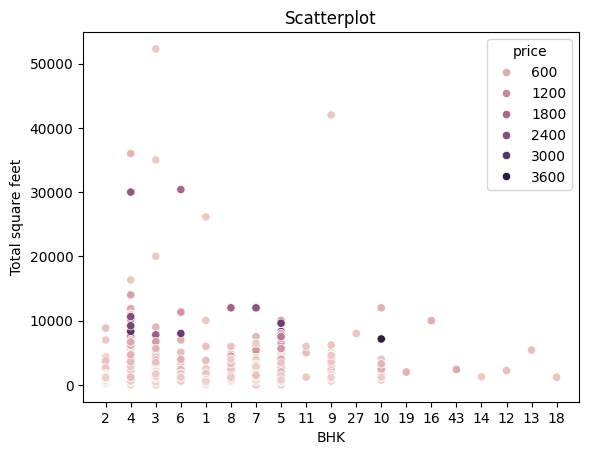

In [184]:
#Scatter plot
sns.scatterplot(x=df5["BHK"],y=df5["total_sqft"],hue=df5["price"])
plt.xlabel("BHK")
plt.ylabel("Total square feet")
plt.title("Scatterplot")
plt.show()

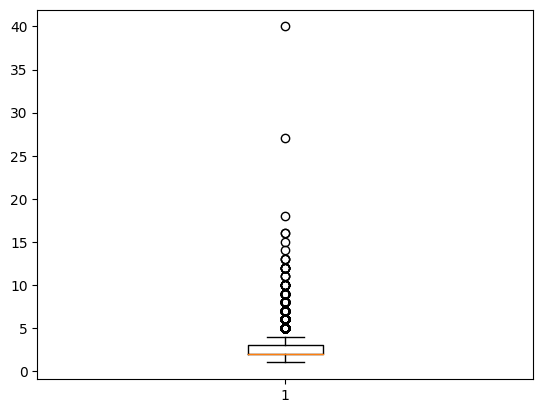

In [185]:
#Boxplot
plt.boxplot(df5["bath"])
plt.show()

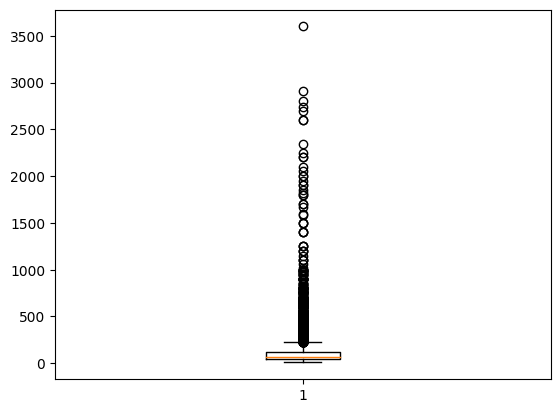

In [186]:
#Boxplot
plt.boxplot(df5["price"])
plt.show()

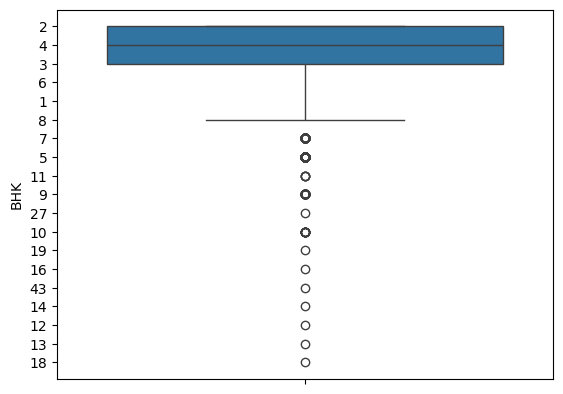

In [187]:
#Boxplot
sns.boxplot(df5["BHK"])
plt.show()

The above columns have outliers that needs to be eliminated

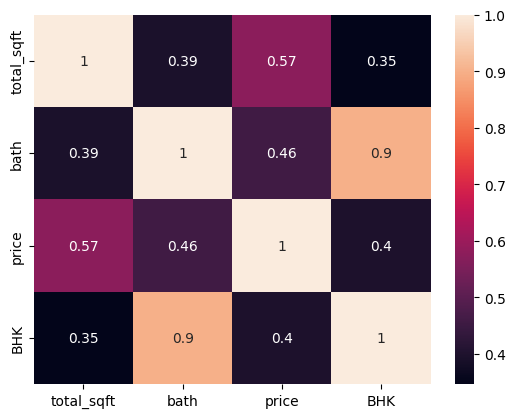

In [188]:
#Heatmap
cols = ["total_sqft","bath","price","BHK"]
corr_matrix = df5[cols].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

The tota square feet is positvely correlated with price

#Feature engineering

In [189]:
df5.head(10)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [190]:
#Adding a new feature called price per square feet
#Calculating price per square feet
df5["price_per_sq_ft"] = (df5["price"] * 100000) / df5["total_sqft"]

In [191]:
df5.head(10)

,location,total_sqft,bath,price,BHK,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,1020.0,6.0,370.00,6,36274.509804


In [192]:
#Location column has multiple unique values. Multi-dimensionality problem - One-hot encoding is tedious
#So, dimensionality reduction can be performed to redce the number of locations
df5["location"].value_counts()

,count
location,
Whitefield,532
Sarjapur Road,392
Electronic City,302
Kanakpura Road,264
Thanisandra,232
...,...
Indiranagar HAL 2nd Stage,1
Maruthi HBCS Layout,1
K R C kothanur,1


(array([6462., 2506., 1433.,  880.,  633.,  386.,  309.,  255.,  191.,
         145.]),
 array([   0. ,  129.7,  259.4,  389.1,  518.8,  648.5,  778.2,  907.9,
        1037.6, 1167.3, 1297. ]),
 <BarContainer object of 10 artists>)

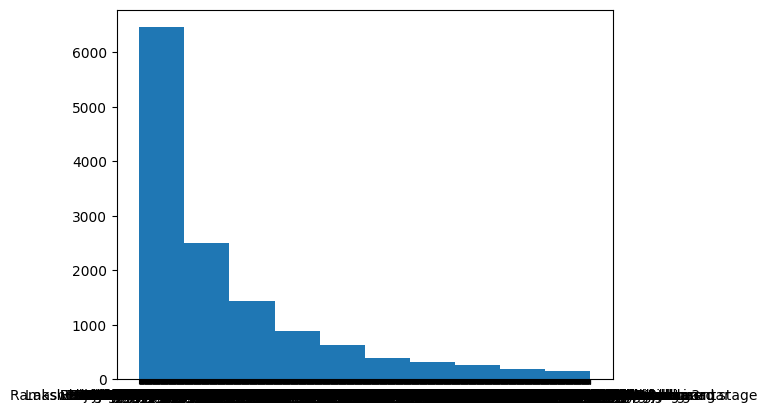

In [193]:
plt.hist(df5["location"])

In [194]:
#Majority of the locations are repeated only once, so it can be fit into the "others" category
df5.location = df5.location.apply(lambda x:x.strip())
location_stats = df5.location.value_counts(ascending=False)
location_stats

,count
location,
Whitefield,533
Sarjapur Road,392
Electronic City,304
Kanakpura Road,264
Thanisandra,235
...,...
Rajanna Layout,1
Subramanyanagar,1
Lakshmipura Vidyaanyapura,1


In [195]:
#Total number of unique location values
len(location_stats)

1287

In [196]:
#Number of locations with count values less than 10
len(location_stats[location_stats<=10])

1047

In [197]:
#Number of locations with count values greater than 10
len(location_stats[location_stats>10])

240

#Dimensionality reduction

In [198]:
#The locations with count values lesser than or equal to 10 can be categorized as "other"
#By this way, number of categories is reduced and the dimensions of data is reduced
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,count
location,
BTM 1st Stage,10
Gunjur Palya,10
Nagappa Reddy Layout,10
Sector 1 HSR Layout,10
Thyagaraja Nagar,10
...,...
Rajanna Layout,1
Subramanyanagar,1
Lakshmipura Vidyaanyapura,1


In [199]:
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [200]:
df5.head(10)

,location,total_sqft,bath,price,BHK,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [201]:
df5.isnull().sum()

,0
location,0
total_sqft,0
bath,0
price,0
BHK,0
price_per_sq_ft,0


In [202]:
null_rows = df5[df5.isnull().any(axis=1)]
null_rows

,location,total_sqft,bath,price,BHK,price_per_sq_ft


In [203]:
locations = ["total_sqft","bath","price","BHK"]
for col in locations:
  df5[col] = df5[col].astype(int)

#Removal of outliers using business logic

In [204]:
#Removing plots based on domain knowledge by discussing with the domain expert
#Suppose, square feet per bedroom should be atleast 300
#Then, those plots with square feet per bedroom less than 300 are removed. Minimum threshold for square feet per BHK is 300
df5[(df5.total_sqft/df5.BHK)<300].head()

,location,total_sqft,bath,price,BHK,price_per_sq_ft
9,other,1020,6,370,6,36274.509804
45,HSR Layout,600,9,200,8,33333.333333
58,Murugeshpalya,1407,4,150,6,10660.980810
68,Devarachikkanahalli,1350,7,85,8,6296.296296
70,other,500,3,100,3,20000.000000


In [205]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)]

In [206]:
df6["total_sqft"].shape

(12456,)

In [207]:
#Statistis of the column
df6["total_sqft"].describe()

,total_sqft
count,12456.000000
mean,1590.184249
std,1260.404416
min,300.000000
25%,1115.000000
50%,1300.000000
75%,1700.000000
max,52272.000000


#Outliers removal based on standard deviation and mean

The maximum value varies greatly from the mean value. Hence, these extreme values are outliers that needs to be removed

In [208]:
#Removal of outliers from total_sq_ft column
#For each location, the total_sq_ft value is retrieved. Only those values that fall in the 68% area are appended to the new data frame
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #Sub data frames are retrieved from the original data frame and the sub data frame values are grouped by location
        mean = np.mean(subdf.price_per_sq_ft) #Mean of the sub dataframe is calculated
        std = np.std(subdf.price_per_sq_ft) #Standard deviation of the sub dataframe is calculated
        reduced_df = subdf[(subdf.price_per_sq_ft>(mean-std)) & (subdf.price_per_sq_ft<=(mean+std))] #Value of new sub data frame - Retrieveing those square feet values that fall within one standard from the left and right of mean value
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) #The output is each sub data frame is concatenated to the output data frame
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 6)

Text(0.5, 1.0, 'Histogram for price per square feet')

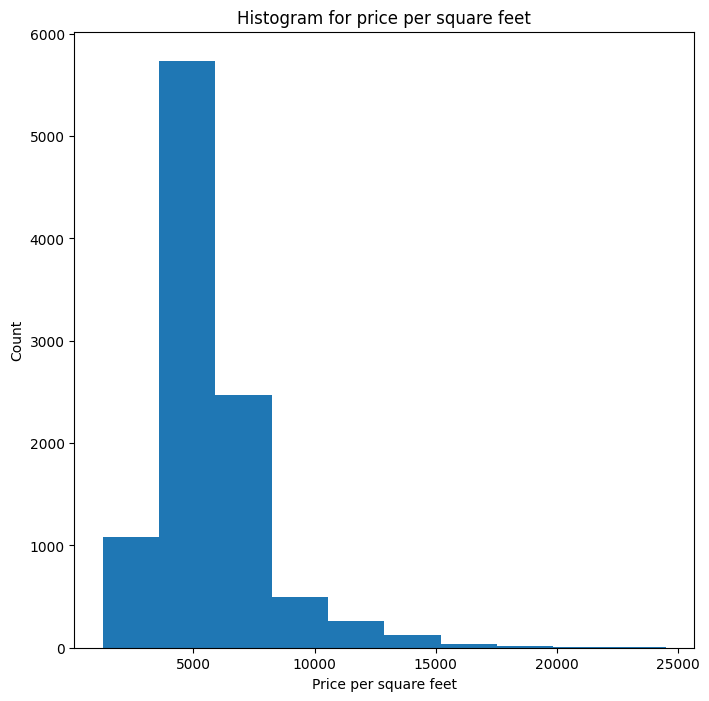

In [209]:
#Visualizing price per square feet column using histogram
plt.figure(figsize = (8,8))
plt.hist(df7.price_per_sq_ft)
plt.xlabel("Price per square feet")
plt.ylabel("Count")
plt.title("Histogram for price per square feet")

In [210]:
#Visualizing bath column using histogram
df7.bath.unique()

array([ 4,  3,  2,  5,  8,  1,  6,  7,  9, 12, 16, 13])

In [211]:
df7.bath.value_counts()

,count
bath,
2,5929
3,2620
4,677
1,614
5,235
6,108
7,27
8,17
9,10


Text(0.5, 1.0, 'Histogram for number of bathrooms')

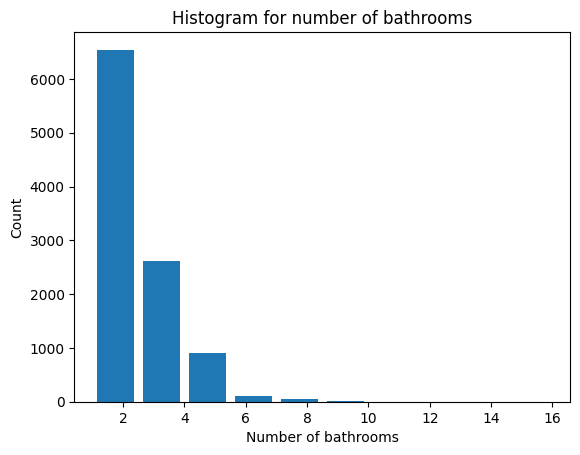

In [212]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.title("Histogram for number of bathrooms")

There are very few houses with more than 10 bathrooms. These values can be removed

In [213]:
df7[df7.bath>10]

,location,total_sqft,bath,price,BHK,price_per_sq_ft
5277,Neeladri Nagar,4000,12,160,10,4000.000000
8483,other,12000,12,525,10,4375.000000
8572,other,10000,16,550,16,5500.000000
9306,other,6000,12,150,11,2500.000000
9637,other,5425,13,275,13,5069.124424


In [214]:
df7[df7.bath>df7.BHK+2]

,location,total_sqft,bath,price,BHK,price_per_sq_ft
1626,Chikkabanavar,2460,7,80,4,3252.032520
5238,Nagasandra,7000,8,450,4,6428.571429
6711,Thanisandra,1806,6,116,3,6423.034330
8408,other,11338,9,1000,6,8819.897689


In [215]:
#Houses with bath twice more than the number of bedrooms are removed
df8 = df7[df7.bath<df7.BHK+2]

In [216]:
df7.shape

(10242, 6)

In [217]:
df8.shape

(10148, 6)

In [218]:
#price_per_sq_ft column is not needed anymore
df9 = df8.drop(["price_per_sq_ft"],axis=1)

In [219]:
#Visualizing the clean data
df9.head(10)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850,4,428,4
1,1st Block Jayanagar,1630,3,194,3
2,1st Block Jayanagar,1875,2,235,3
3,1st Block Jayanagar,1200,2,130,3
4,1st Block Jayanagar,1235,2,148,2
5,1st Block Jayanagar,2750,4,413,4
6,1st Block Jayanagar,2450,4,368,4
7,1st Phase JP Nagar,2825,4,250,4
8,1st Phase JP Nagar,1875,3,167,3
9,1st Phase JP Nagar,1500,5,85,5


#One-hot encoding

In [220]:
#One-hot encoding of location column
dummies = pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [221]:
#Concatenating df9 and dummies
df10 = pd.concat([df9,dummies.drop(["other"],axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850,4,428,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630,3,194,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875,2,235,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200,2,130,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235,2,148,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [222]:
df11 = df10.drop(["location"],axis=1)

In [223]:
df11.shape

(10148, 244)

#Model building

In [224]:
#Splitting of the dataset into input and output
X = df11.drop(["price"],axis=1)
Y = df11["price"]

In [225]:
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850,4,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630,3,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875,2,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200,2,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235,2,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [226]:
Y.head()

,price
0,428
1,194
2,235
3,130
4,148


In [227]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [228]:
#Building linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
accuracy = lr.score(X_train,Y_train)
print("The accuracy of the model is : {}".format(round(accuracy*100,2)))

The accuracy of the model is : 82.07


In [229]:
#k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross_validation = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cross_validation)

array([0.81559614, 0.87002375, 0.80234525, 0.82201429, 0.75031755])

After performing 5-fold cross validation on the dataset, a highest accuracy of 87% is obtained on the training set

In [230]:
#Training multiple models
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [231]:
key = ['Logistic Regression','Lasso','Decision tree']
value = [LinearRegression(), Lasso(),DecisionTreeRegressor(random_state=10)]
models = dict(zip(key,value))
models

{'Logistic Regression': LinearRegression(),
 'Lasso': Lasso(),
 'Decision tree': DecisionTreeRegressor(random_state=10)}

In [232]:
#Performance evaluation of models
mod=[]
scores = []
for name,algo in models.items():
    model = algo
    train = model.fit(X_train,Y_train)
    accuracy = round(train.score(X_train,Y_train) * 100,2)
    r_squared = train.score(X, Y)
    scores.append({
            'Model': name,
            'Accuracy': accuracy,
            'R-square' : r_squared
        })

print(pd.DataFrame(scores,columns=['Model','Accuracy','R-square']))


                 Model  Accuracy  R-square
0  Logistic Regression     82.07  0.815020
1                Lasso     68.34  0.682417
2        Decision tree     97.83  0.932408


#Testing of model

In [233]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [234]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.42135353063225

In [235]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.76623280439497

In [236]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


168.5713666570837

In [237]:
predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


170.91624593084643